# GraphMissingEdges Challenge 1

In [13]:
#Importing bibs
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import statistics
import community as community_louvain
from networkx.algorithms.community import k_clique_communities

In [25]:
allCategories = pd.read_csv("../categories.csv", index_col=0)
G = nx.read_gml("../GraphMissingEdges.gml")
print(nx.info(G))

Graph with 11080 nodes and 52990 edges


## Initial analisys 

In [58]:
n = G.number_of_nodes()
e = G.number_of_edges()
print("Number of nodes : %d" % n)
print("Number of edges : %d" % e)
print("Number of connected components : %d" % nx.number_connected_components(G))

Number of nodes : 11080
Number of edges : 52990
Number of connected components : 1489


In [59]:
print("Max degree of nodes:")
sorted(G.degree, key=lambda x: x[1], reverse=True)

Max degree of nodes:


[('r_BrIgzYcwo1NAuG9dLbpg', 502),
 ('iGEvDk6hsizigmXhDKs2Vg', 260),
 ('0a2O150ytxrDjDzXNfRWkA', 237),
 ('hPXR-Bi8U-uz6TUViqmGpg', 237),
 ('G24p1oGGfY3t-m8Z2lPCaQ', 219),
 ('bLrjQj3G9NAyKoi5EROj1Q', 216),
 ('kOFDVcnj-8fd3doIpCQ06A', 215),
 ('JG9UpsFR6hrqQqsKh_RyaQ', 212),
 ('XYIPXJ9parr9FtvvcGI1SA', 210),
 ('B70iTJjcPkuYn8ouUewWgw', 206),
 ('U4iqELk1IiqARpk5uJJOZg', 198),
 ('xL9EhlYVMSe2mdkisYjXog', 197),
 ('uAAWlLdsoUf872F1FKiX1A', 195),
 ('RtUvSWO_UZ8V3Wpj0n077w', 192),
 ('jc3p5SFyt9qrrMXt6E13ig', 179),
 ('BYDs_o6U4CLxJec8k1Q90Q', 176),
 ('5m2JukTajxMk-qS5W4s-FA', 175),
 ('fNc1WuGwiT7RhqXUIe4S8A', 175),
 ('aLcFhMe6DDJ430zelCpd2A', 172),
 ('_xAJZOKBMPOe47p1MphB2w', 172),
 ('Yl2TN9c23ZGLUBSD9ks5Uw', 171),
 ('e41TP5cXZqSrz50xCBJqZw', 171),
 ('zgQHtqX0gqMw1nlBZl2VnQ', 169),
 ('N_2yEZ41g9zDW_gWArFiHw', 163),
 ('f5O7v_X_jCg2itqacRfxhg', 162),
 ('SjgeuBlgKER9yegpoxT99w', 159),
 ('mZRKH9ngRY92bI_irrHq6w', 157),
 ('5aeOewSy4RiI8sLLWpeNGA', 156),
 ('yY3jNsrpCyKTqQuRuLV8gw', 154),
 ('Fx5haZv9PP3

# Clustering Coeficient

General clustering coeficient: 0.03079
Clustering coeficient evolution analisys:
Items to remove: 1418
Removed 1 degrees nodes: 0.035
Items to remove: 6590
Removed 5 degrees nodes: 0.053
Items to remove: 8400
Removed 10 degrees nodes: 0.072
Items to remove: 9969
Removed 25 degrees nodes: 0.118
Items to remove: 10673
Removed 50 degrees nodes: 0.195
Items to remove: 10988
Removed 100 degrees nodes: 0.355
Items to remove: 11047
Removed 150 degrees nodes: 0.511
Items to remove: 11070
Removed 200 degrees nodes: 0.62
Items to remove: 11078
Removed 250 degrees nodes: 0.0


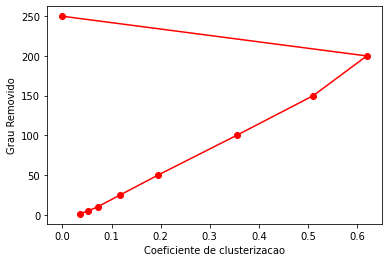

In [47]:
print("General clustering coeficient: "+ str(round(nx.average_clustering(G),5)))

removeDegrees = [1,5,10,25,50,100,150,200,250]

print("Clustering coeficient evolution analisys:")
coefList = []
degreeRemoved = []
for num in removeDegrees:
    G = nx.read_gml("../GraphMissingEdges.gml")
    remove = [node for node,degree in dict(G.degree()).items() if degree < num]
    print("Items to remove: " + str(len(remove)))
    G.remove_nodes_from(remove)
    coef = round(nx.average_clustering(G),3)
    coefList.append(coef)
    degreeRemoved.append(num)
    print("Removed "+ str(num) + " degrees nodes: " + str(coef))

plt.plot(coefList, degreeRemoved, 'ro-') 
plt.xlabel('Coeficiente de clusterizacao')
plt.ylabel('Grau Removido')

# Keep original file to other analisys below
G = nx.read_gml("../GraphMissingEdges.gml")

De acordo com o coeficiente de clusterização demonstrado acima, é possível perceber que o grafo está muito longe de ser completo, pois o coeficiente geral em 0.03 está muito abaixo de 1% de possíveis conexões entre todos os nós, isso é decorrência da grande quantidade de nós e do baixo grau de conexões entre eles, isso fica evidente no histograma acima, com a remoção de nós de baixo grau, o grande aumento do coeficiente para a rede, isso cai bruscamente no final pois apenas 2 nós possuem mais de 250 arestas.
Esse coeficiente também comprova que o grafo não tem probabilidade de ter sido gerado aleatoriamente, pois há muitos nós sem arestas e alguns nós com muitas arestas, o que tornou o grafo desbalanceado.

# Nodes Degrees Distribution

Degree Mean: 89.80503144654088
Degree Median: 80


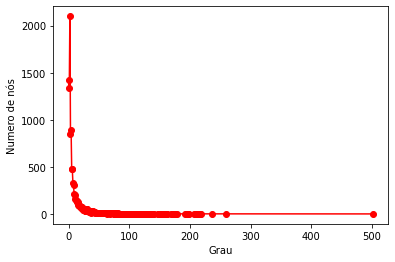

In [54]:
dicDegree = dict(G.degree())
valores = sorted(set(dicDegree.values()))
hist = [list(dicDegree.values()).count(x) for x in valores]
plt.plot(valores, hist, 'ro-') 
plt.xlabel('Grau')
plt.ylabel('Numero de nós')

degreeMean = statistics.mean(valores)
print("Degree Mean: " + str(degreeMean))
degreeMedian = statistics.median(valores)
print("Degree Median: "+ str(degreeMedian))

Text(0, 0.5, 'Numero de nós')

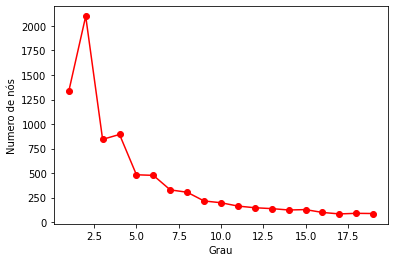

In [55]:
# Nodes degrees distribution zoomed
dicDegree1={k: v for k, v in dicDegree.items() if v > 0 and v < 20}
valores = sorted(set(dicDegree1.values()))
hist = [list(dicDegree1.values()).count(x) for x in valores]
plt.plot(valores, hist, 'ro-') 
plt.xlabel('Grau')
plt.ylabel('Numero de nós')

Text(0, 0.5, 'Numero de nós')

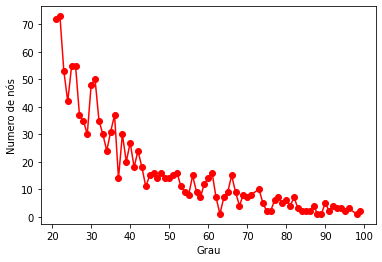

In [56]:
# Nodes degrees distribution zoomed
dicDegree2={k: v for k, v in dicDegree.items() if v > 20 and v < 100}
valores = sorted(set(dicDegree2.values()))
hist = [list(dicDegree2.values()).count(x) for x in valores]
plt.plot(valores, hist, 'ro-') 
plt.xlabel('Grau')
plt.ylabel('Numero de nós')

Text(0, 0.5, 'Numero de nós')

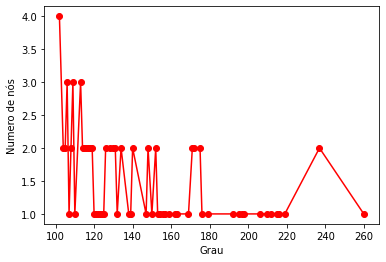

In [57]:
# Nodes degrees distribution zoomed
dicDegree3={k: v for k, v in dicDegree.items() if v > 100 and v < 502}
valores = sorted(set(dicDegree3.values()))
hist = [list(dicDegree3.values()).count(x) for x in valores]
plt.plot(valores, hist, 'ro-') 
plt.xlabel('Grau')
plt.ylabel('Numero de nós')

Através da distribuição foi percebido que nós com poucas conexões são a grande maioria apesar da média e mediana estarem 89 e 80 respectivamente, quem puxa essa conta para cima são os nós mais com mais conexões, como pode ser visto nos histogramas acima.

# Centralities

## Degree centrality

In [6]:
degree = nx.degree_centrality(G)
sort_orders = sorted(degree.items(), key=lambda degree: degree[1], reverse=True)
# print(sort_orders)
top50 = sort_orders[:50]

dfDegree = pd.DataFrame(columns=['key','value','name','categories'])

print("Centralidade de grau")
for key,value in top50:
    cats = G.nodes[key]['categories'].split(",")
    categoriesString = []
    for cat in cats:
        categoriesString.append(allCategories.loc[int(cat)]['names'])

    dfDegree.loc[key] = pd.Series({'key':key ,'value':round(value,6), 'name':G.nodes[key]['name'], 'categories':", ".join(categoriesString)})

dfDegree = dfDegree.set_index('key')
print(dfDegree)
# print(dfDegree.info())
# print(dfDegree.index)
dfDegree.to_csv('degreeCentrality.csv', sep=',', encoding='utf-8')

Centralidade de grau
                           value                                  name  \
key                                                                      
r_BrIgzYcwo1NAuG9dLbpg  0.045311             Pai Northern Thai Kitchen   
iGEvDk6hsizigmXhDKs2Vg  0.023468          Seven Lives Tacos Y Mariscos   
0a2O150ytxrDjDzXNfRWkA  0.021392                                  Miku   
hPXR-Bi8U-uz6TUViqmGpg  0.021392                        Fat Ninja Bite   
G24p1oGGfY3t-m8Z2lPCaQ  0.019767                                Tinuno   
bLrjQj3G9NAyKoi5EROj1Q  0.019496                          iHalo Krunch   
kOFDVcnj-8fd3doIpCQ06A  0.019406              Mildred's Temple Kitchen   
JG9UpsFR6hrqQqsKh_RyaQ  0.019135                                Planta   
XYIPXJ9parr9FtvvcGI1SA  0.018955                GB Hand-pulled Noodles   
B70iTJjcPkuYn8ouUewWgw  0.018594                             Gusto 101   
U4iqELk1IiqARpk5uJJOZg  0.017872               Eva's Original Chimneys   
xL9EhlYVMSe2mdkis

## Betweenness centrality

In [7]:
betweenness = nx.betweenness_centrality(G)
sort_orders = sorted(betweenness.items(), key=lambda betweenness: betweenness[1], reverse=True)
# print(sort_orders)
top50 = sort_orders[:50]

dfBetweenness = pd.DataFrame(columns=['key','value','name','categories'])

print("Centralidade de proximidade")
for key,value in top50:
    cats = G.nodes[key]['categories'].split(",")
    categoriesString = []
    for cat in cats:
        categoriesString.append(allCategories.loc[int(cat)]['names'])

    dfBetweenness.loc[key] = pd.Series({'key':key ,'value':round(value,6), 'name':G.nodes[key]['name'], 'categories':", ".join(categoriesString)})

dfBetweenness = dfBetweenness.set_index('key')
print(dfBetweenness)
# print(dfBetweenness.info())
# print(dfBetweenness.index)
dfBetweenness.to_csv('betweennessCentrality.csv', sep=',', encoding='utf-8')

Centralidade de proximidade
                           value                                  name  \
key                                                                      
r_BrIgzYcwo1NAuG9dLbpg  0.053927             Pai Northern Thai Kitchen   
iGEvDk6hsizigmXhDKs2Vg  0.017764          Seven Lives Tacos Y Mariscos   
hPXR-Bi8U-uz6TUViqmGpg  0.014250                        Fat Ninja Bite   
XYIPXJ9parr9FtvvcGI1SA  0.013402                GB Hand-pulled Noodles   
G24p1oGGfY3t-m8Z2lPCaQ  0.013044                                Tinuno   
JG9UpsFR6hrqQqsKh_RyaQ  0.012744                                Planta   
0a2O150ytxrDjDzXNfRWkA  0.012591                                  Miku   
kOFDVcnj-8fd3doIpCQ06A  0.012419              Mildred's Temple Kitchen   
xL9EhlYVMSe2mdkisYjXog  0.012151                        The Halal Guys   
RtUvSWO_UZ8V3Wpj0n077w  0.011654                KINKA IZAKAYA ORIGINAL   
bLrjQj3G9NAyKoi5EROj1Q  0.011580                          iHalo Krunch   
U4iqELk1Ii

## Closeness centrality

In [8]:
closeness = nx.closeness_centrality(G)
sort_orders = sorted(closeness.items(), key=lambda closeness: closeness[1], reverse=True)
# print(sort_orders)
top50 = sort_orders[:50]

dfCloseness = pd.DataFrame(columns=['key','value','name','categories'])

print("Centralidade de proximidade")
for key,value in top50:
    cats = G.nodes[key]['categories'].split(",")
    categoriesString = []
    for cat in cats:
        categoriesString.append(allCategories.loc[int(cat)]['names'])

    dfCloseness.loc[key] = pd.Series({'key':key ,'value':round(value,6), 'name':G.nodes[key]['name'], 'categories':", ".join(categoriesString)})

dfCloseness = dfCloseness.set_index('key')
print(dfCloseness)
# print(dfCloseness.info())
# print(dfCloseness.index)
dfCloseness.to_csv('closenessCentrality.csv', sep=',', encoding='utf-8')

Centralidade de proximidade
                           value                                  name  \
key                                                                      
r_BrIgzYcwo1NAuG9dLbpg  0.349649             Pai Northern Thai Kitchen   
iGEvDk6hsizigmXhDKs2Vg  0.325540          Seven Lives Tacos Y Mariscos   
hPXR-Bi8U-uz6TUViqmGpg  0.323142                        Fat Ninja Bite   
0a2O150ytxrDjDzXNfRWkA  0.322582                                  Miku   
kOFDVcnj-8fd3doIpCQ06A  0.320239              Mildred's Temple Kitchen   
G24p1oGGfY3t-m8Z2lPCaQ  0.317758                                Tinuno   
XYIPXJ9parr9FtvvcGI1SA  0.317549                GB Hand-pulled Noodles   
xL9EhlYVMSe2mdkisYjXog  0.317094                        The Halal Guys   
RtUvSWO_UZ8V3Wpj0n077w  0.316556                KINKA IZAKAYA ORIGINAL   
BYDs_o6U4CLxJec8k1Q90Q  0.316373                             Poke Guys   
fNc1WuGwiT7RhqXUIe4S8A  0.316214           Sabai Sabai Kitchen and Bar   
bLrjQj3G9N

## Eigenvector centrality

In [ ]:
eigenvector = nx.eigenvector_centrality(G)
sort_orders = sorted(eigenvector.items(), key=lambda eigenvector: eigenvector[1], reverse=True)
# print(sort_orders)
top50 = sort_orders[:50]

dfEigenvector = pd.DataFrame(columns=['key','value','name','categories'])

print("Centralidade de proximidade")
for key,value in top50:
    cats = G.nodes[key]['categories'].split(",")
    categoriesString = []
    for cat in cats:
        categoriesString.append(allCategories.loc[int(cat)]['names'])

    dfEigenvector.loc[key] = pd.Series({'key':key ,'value':round(value,6), 'name':G.nodes[key]['name'], 'categories':", ".join(categoriesString)})

dfEigenvector = dfEigenvector.set_index('key')
print(dfEigenvector)
# print(dfEigenvector.info())
# print(dfEigenvector.index)
dfEigenvector.to_csv('eigenvectorCentrality.csv', sep=',', encoding='utf-8')

Ao se comparar os tipos de centralidades e os valores calculados para o grafo, o primeiro lugar para todas as análises  foi o local "Pai Northern Thai Kitchen", porém, os valores alteram de acordo com cada centralidade, na centralidade de grau, proximidade e intermediação, esse local ficou com valores 0.045, 0.34 e 0.053 respectivamente, isso comprova que esse nó realmente é muito importante para a rede, pois é muito utilizado como conexões de menores caminhos, possui muitas conexões e funciona como ponte principal entre muitos pares de nós, entretanto, seu valor para a centralidade Eigenvector ficou baixo (mas maior em relação aos outros nós) o que deixa a entender que é um nó que acaba perdendo um pouco de importância para buscas, mas ainda sim é a melhor opção.

Para a centralidade de proximidade, muitos nós ficaram com valores razoavelmente altos, valores acima de 0,3, o que demonstra que são nós muito próximos uns dos outros, isso explica o centro mais populoso no centro do desenho do grafo (ver imagem abaixo).

Os usuários não demonstraram nenhum local com conexão importante entre dois outros locais, que é o caso da intermediação, o maior valor foi de 0.05 e 0.01 para Pai Northern Thai Kitchen e Seven Lives Tacos Y Mariscos respectivamente, o que demonstra valores muito baixos.

# Communities

## Louvain Algorithm

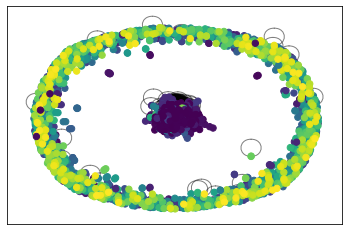

In [12]:
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

Com a aplicação do algoritmo de Louvain, foi possível detectar a divisão das comunidades, principalmente entre as do centro que não se conectaram com o anel externo, mas mesmo entre elas é possível perceber várias comunidades ao observar a tonalidade das cores e as inúmeras arestas.

## K-clique Algorithm (k=4)

In [15]:
kclique = k_clique_communities(G,4)
kclique = list(kclique)
# print(kclique[0])

print(str(len(kclique)) + " clusters")

# for each cluster
for cluster in kclique:
    # for each item inside cluster
    for item in cluster:
        cats = G.nodes[item]['categories'].split(",")
        categories = []
        for cat in cats:
            categories.append(allCategories.loc[int(cat)]['names'])
        
        # remove duplicates in categories
        res = []
        for i in categories:
            if i not in res:
                res.append(i)
    print("Categories: " + ", ".join(res))


144 clusters
Categories: Pizza, Restaurants, Italian, Salad, Gluten-Free
Categories: Italian, Pizza, Restaurants
Categories: Vegetarian, Vegan, Restaurants, Chinese
Categories: Breakfast & Brunch, Canadian (New), Restaurants, Tapas Bars, Gluten-Free, Comfort Food, Vegan
Categories: Food, Chocolatiers & Shops, Ice Cream & Frozen Yogurt, Specialty Food, Desserts
Categories: Sandwiches, Restaurants
Categories: Nightlife, Steakhouses, Bars, Restaurants, Barbeque, Brazilian
Categories: Shopping Centers, Shopping, Fashion, Department Stores
Categories: Restaurants, Vietnamese
Categories: Canadian (New), Restaurants
Categories: Canadian (New), Restaurants
Categories: Thai, Restaurants
Categories: Restaurants, Cocktail Bars, Nightlife, Canadian (New), Bars
Categories: Restaurants, Thai
Categories: Cafes, Restaurants, Coffee & Tea, Sandwiches, Food
Categories: Thai, Restaurants, Vegan
Categories: Restaurants, Desserts, Sandwiches, Cafes, French, Coffee & Tea, Food, Breakfast & Brunch
Categories

Categories: Escape Games, Arcades, Arts & Entertainment, Active Life
Categories: Breakfast & Brunch, Diners, Restaurants
Categories: Restaurants, Vietnamese
Categories: Restaurants, Desserts, Salad, Food, Pizza, Burgers, American (Traditional)
Categories: American (Traditional), Restaurants, Food, Nightlife, Pubs, Bars, Breweries
Categories: Sushi Bars, Restaurants, Japanese
Categories: Restaurants, Korean
Categories: Food, Restaurants, French, Event Planning & Services, Venues & Event Spaces, Coffee & Tea, Cafes
Categories: Restaurants, Korean
Categories: Restaurants, Sushi Bars
Categories: Sandwiches, Restaurants, Asian Fusion, Food, Delicatessen, Vietnamese
Categories: Breakfast & Brunch, Sushi Bars, Japanese, Restaurants
Categories: Seafood, Restaurants, Mexican
Categories: Nightlife, Lounges, Restaurants, Bars, Cocktail Bars, American (Traditional)
Categories: Creperies, Restaurants
Categories: Middle Eastern, Mediterranean, Food, Lebanese, Cafes, Restaurants, Bakeries
Categories:

Através dos 144 clusters encontrados após aplicar o algoritmo K-Clique, considerando cliques de tamanho 4, ao comparar as categorias, percebeu-se uma grande hegemonia por categorias de alimentação, com grande foco aos restaurantes, além disso, outros clusters interessantes se formaram e fazem total sentido, como o caso de bares e casas noturnas e também locais com opções veganas e vegetarianas.